In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Loading the dataset into the notebook

data = pd.read_csv("lms-Copy1.csv")
data

,user_id,assignments_viewed,assignments_submitted,quiz_started,quiz_submitted,quiz_reviewed,quiz_viewed,forums_viewed,page_views,resources_viewed,quiz_1,quiz_2,assignment,project,final_exam,total_score
0,16,18,1,4,4,3,104,37,5,19,5.0,2.94,8,0,0.00,15.94
1,17,52,2,3,3,2,125,50,10,6,4.0,3.82,6,20,37.67,71.49
2,18,134,4,3,2,1,170,289,37,61,3.5,2.21,5,14,26.67,51.37
3,19,134,3,3,3,2,139,30,0,30,4.0,2.30,5,14,31.17,56.47
4,20,38,2,3,3,12,142,35,12,12,3.0,3.82,10,20,35.33,72.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,441,4,0,0,0,0,1,0,0,12,0.0,0.00,0,0,0.00,0.00
226,449,69,2,2,2,2,60,0,0,6,4.5,1.18,5,8,32.67,51.34
227,450,37,2,2,2,1,46,3,1,36,5.0,4.12,7,15,26.50,57.62
228,451,68,1,1,1,0,66,79,7,26,0.0,2.40,2,0,44.00,48.40


In [3]:
# Removing rows that contain 0 in the final_exam score

data = data[data['final_exam'] != 0]
data

,user_id,assignments_viewed,assignments_submitted,quiz_started,quiz_submitted,quiz_reviewed,quiz_viewed,forums_viewed,page_views,resources_viewed,quiz_1,quiz_2,assignment,project,final_exam,total_score
1,17,52,2,3,3,2,125,50,10,6,4.0,3.82,6,20,37.67,71.49
2,18,134,4,3,2,1,170,289,37,61,3.5,2.21,5,14,26.67,51.37
3,19,134,3,3,3,2,139,30,0,30,4.0,2.30,5,14,31.17,56.47
4,20,38,2,3,3,12,142,35,12,12,3.0,3.82,10,20,35.33,72.16
5,21,11,0,2,2,2,95,11,0,3,2.0,0.00,0,0,30.50,32.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,438,17,1,2,2,8,86,14,0,29,0.0,4.12,0,19,34.67,57.78
226,449,69,2,2,2,2,60,0,0,6,4.5,1.18,5,8,32.67,51.34
227,450,37,2,2,2,1,46,3,1,36,5.0,4.12,7,15,26.50,57.62
228,451,68,1,1,1,0,66,79,7,26,0.0,2.40,2,0,44.00,48.40


In [4]:
# Splitting data into features and target variable

X = data[['assignments_viewed', 'assignments_submitted', 'quiz_started', 'quiz_submitted', 
          'quiz_reviewed', 'quiz_viewed', 'forums_viewed', 'page_views', 'resources_viewed','quiz_1','quiz_2','assignment','project']]
y = data['final_exam']  # Target variable

In [5]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Model Training

# Define SVM model
svm = SVR()

# Define hyperparameters for tuning
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

svm.fit(X_train, y_train)

# Train the SVM model with best hyperparameters
best_svm = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)

SVR(C=0.1, gamma=0.1, kernel='linear')

In [8]:
# Predictions
y_pred = best_svm.predict(X_test)

In [9]:
# Feature Selection
# Using recursive feature elimination to find the significance of each feature

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['quiz_started', 'quiz_viewed', 'resources_viewed', 'quiz_2', 'project'], dtype='object')


In [10]:
# Regression metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 4.728023703082306
Mean Squared Error: 41.92674054911539
Root Mean Squared Error: 6.475086142215823
R-squared Score: 0.10704511843786169


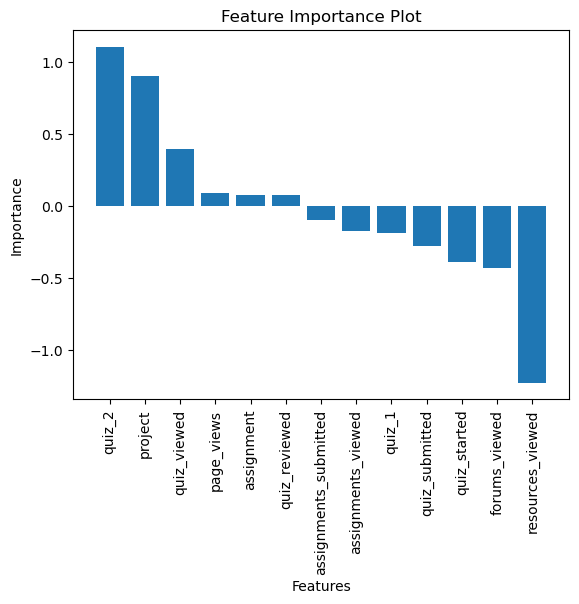

In [11]:
# Plot Feature Importance
feature_importance = best_svm.coef_[0]
sorted_indices = feature_importance.argsort()[::-1]
plt.bar(range(X.shape[1]), feature_importance[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

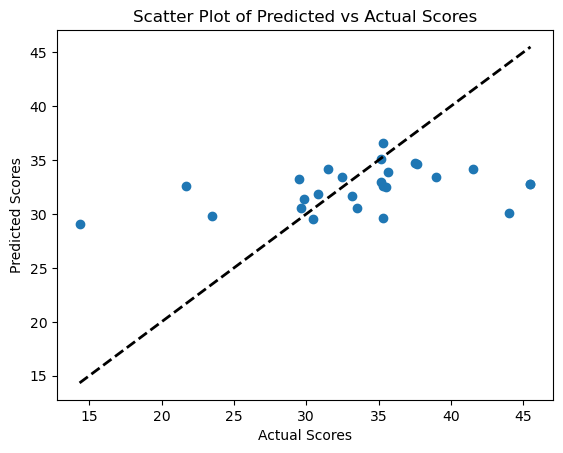

In [12]:
# Scatter Plot of Predicted vs Actual Scores
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Scatter Plot of Predicted vs Actual Scores')
plt.show()

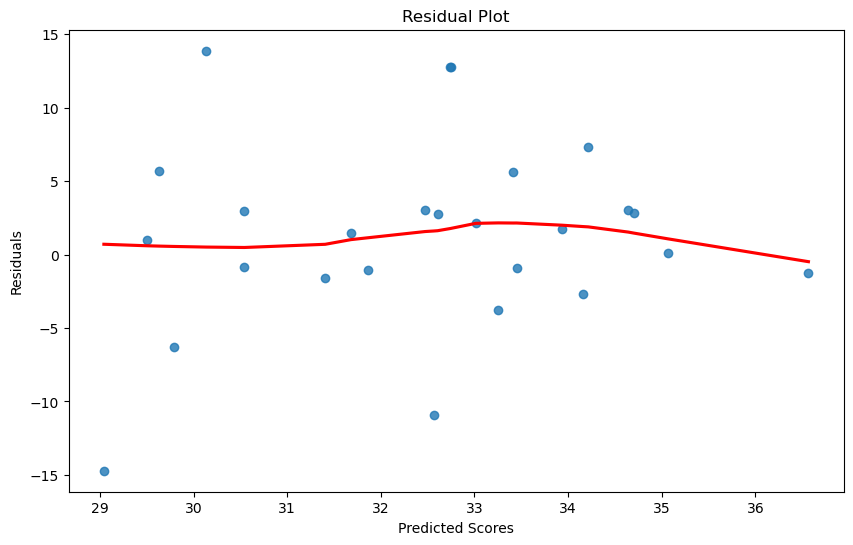

In [13]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={"color": "red"})
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

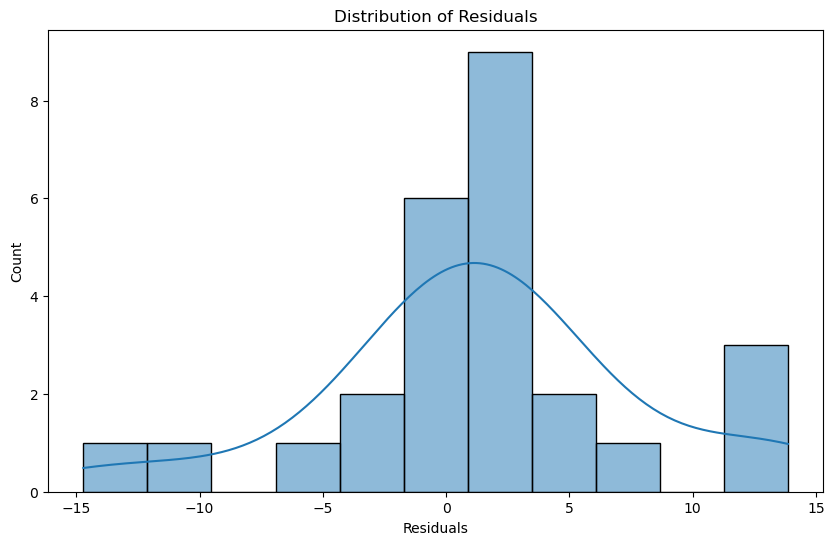

In [14]:
# Visualization 4: Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [15]:
import pickle
#Save the model using pickle
with open('support_vector_machine_model.pkl', 'wb') as model_file:
    pickle.dump(svm, model_file)